
# 6.	Insurance Claims Data Analysis (Python)

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

In [2]:
claims_path = r"G:\My Courses\0. AnalytixLabs\4. Python for Data Science\1. Case Studies\3. Case Study 3 - Insurance Claims Case Study\claims.csv"
cust_path = r"G:\My Courses\0. AnalytixLabs\4. Python for Data Science\1. Case Studies\3. Case Study 3 - Insurance Claims Case Study\cust_demographics.csv"

In [3]:
claims_path, cust_path

('G:\\My Courses\\0. AnalytixLabs\\4. Python for Data Science\\1. Case Studies\\3. Case Study 3 - Insurance Claims Case Study\\claims.csv',
 'G:\\My Courses\\0. AnalytixLabs\\4. Python for Data Science\\1. Case Studies\\3. Case Study 3 - Insurance Claims Case Study\\cust_demographics.csv')

## 1. Load & combine data

In [4]:

claims = pd.read_csv(claims_path)
cust = pd.read_csv(cust_path)

print("Claims shape:", claims.shape)
print("Customer shape:", cust.shape)
print("\nClaims columns:", claims.columns.tolist())
print("Customer columns:", cust.columns.tolist())

Claims shape: (1100, 10)
Customer shape: (1085, 6)

Claims columns: ['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area', 'police_report', 'claim_type', 'claim_amount', 'total_policy_claims', 'fraudulent']
Customer columns: ['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment']


In [5]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [6]:
cust.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold



### Q1. Import and create a 360° view of the data

In [7]:
cust_renamed = cust.rename(columns={"CUST_ID": "customer_id"})


data = claims.merge(cust_renamed, on="customer_id", how="left")
print("Combined shape:", data.shape)
data.head()


Combined shape: (1100, 15)


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,Male,13-May-77,NV,956-871-8691,Gold



## 2. Data audit – datatypes & mismatches


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  gender               1085 non-null   object 
 11  DateOfBirth          1085 non-null   object 
 12  State                1085 non-null   object 
 13  Contact              1085 non-null   object 
 14  Segment              1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [9]:
for col in ["gender", "State", "Segment", "incident_cause", "claim_type", "police_report", "fraudulent"]:
    if col in data.columns:
        print(f"\nColumn: {col}")
        print(data[col].value_counts())



Column: gender
Male      556
Female    529
Name: gender, dtype: int64

Column: State
NY    31
AR    29
DE    29
AL    28
ME    28
ND    27
ID    27
TN    27
RI    26
IA    26
NV    26
MA    26
SD    25
CO    25
CT    25
FL    24
NC    24
WI    23
IL    23
TX    22
IN    22
OH    22
MO    22
VT    22
NE    21
PA    21
MD    21
OK    21
AK    20
WV    20
MT    20
LA    20
NM    19
WA    19
GA    19
KS    19
SC    19
NH    18
MI    18
VA    18
UT    18
HI    17
CA    17
MN    17
NJ    17
MS    17
WY    17
AZ    15
OR    14
KY    14
Name: State, dtype: int64

Column: Segment
Gold        375
Platinum    362
Silver      348
Name: Segment, dtype: int64

Column: incident_cause
Other causes          290
Driver error          262
Other driver error    249
Natural causes        189
Crime                 110
Name: incident_cause, dtype: int64

Column: claim_type
Material only          663
Material and injury    241
Injury only            196
Name: claim_type, dtype: int64

Column: police_report
N


## 3. Clean `claim_amount` – convert to numeric

In [10]:
data["claim_amount"] = (
    data["claim_amount"]
    .replace({"\$": "", ",": ""}, regex=True)
    .astype(float)
)

data["claim_amount"].head()


0    2980.0
1    2980.0
2    3369.5
3    1680.0
4    2680.0
Name: claim_amount, dtype: float64


## 4. Alert flag for injury claims with no police report

In [11]:
injury_mask = data["claim_type"].str.contains("Injury", case=False, na=False)
unreported_mask = ~data["police_report"].str.contains("Yes", case=False, na=False)

data["injury_police_alert"] = np.where(injury_mask & unreported_mask, 1, 0)

data[["claim_type", "police_report", "injury_police_alert"]].head(10)


,claim_type,police_report,injury_police_alert
0,Material only,No,0
1,Material only,Unknown,0
2,Material only,No,0
3,Material only,No,0
4,Material only,No,0
5,Injury only,No,1
6,Material only,No,0
7,Material only,No,0
8,Material only,Unknown,0
9,Material only,No,0



## 5. Deduplicate by customer – keep most recent claim

In [12]:
data["claim_date"] = pd.to_datetime(data["claim_date"], format="%m/%d/%Y")


data_sorted = data.sort_values(["customer_id", "claim_date"])
data_unique = data_sorted.drop_duplicates(subset="customer_id", keep="last")

print("Original rows:", data.shape[0])
print("Unique customers / rows:", data_unique.shape[0])
data_unique.head()


Original rows: 1100
Unique customers / rows: 1093


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,injury_police_alert
184,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,Female,23-May-78,DE,962-879-1238,Platinum,1
836,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,Male,20-Dec-72,TX,173-892-6314,Silver,1
677,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,Male,28-Jul-88,FL,364-598-1549,Silver,0
828,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,Male,19-Aug-71,CA,187-348-8375,Gold,0
505,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,Female,10-Aug-80,NC,798-862-5398,Gold,1



## 6. Missing value imputation

- Continuous variables → imputed with **mean**  
- Categorical variables → imputed with **mode**


In [13]:
missing_before = data_unique.isna().sum()
print("Missing values before imputation:\n", missing_before)

data_imputed = data_unique.copy()

for col in data_imputed.columns:
    if data_imputed[col].dtype.kind in "biufc":  # numeric
        if data_imputed[col].isna().any():
            mean_val = data_imputed[col].mean()
            data_imputed[col].fillna(mean_val, inplace=True)
    else:  # categorical / object
        if data_imputed[col].isna().any():
            mode_val = data_imputed[col].mode()[0]
            data_imputed[col].fillna(mode_val, inplace=True)

print("\nMissing values after imputation:\n", data_imputed.isna().sum())


Missing values before imputation:
 claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
injury_police_alert     0
dtype: int64

Missing values after imputation:
 claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
injury_police_alert    0
dtype: int64



## 7. Age & age categories

In [14]:
data_imputed["DateOfBirth"] = pd.to_datetime(data_imputed["DateOfBirth"], format="%d-%b-%y")

ref_date = pd.to_datetime("2018-10-01")
data_imputed["age"] = (ref_date - data_imputed["DateOfBirth"]).dt.days / 365.25

def age_category(age):
    if age < 18:
        return "Children"
    elif age < 30:
        return "Youth"
    elif age <= 60:
        return "Adult"
    else:
        return "Senior"

data_imputed["age_group"] = data_imputed["age"].apply(age_category)

data_imputed[["customer_id", "DateOfBirth", "age", "age_group"]].head()


,customer_id,DateOfBirth,age,age_group
184,154557,1978-05-23,40.358658,Adult
836,263204,1972-12-20,45.779603,Adult
677,287476,1988-07-28,30.176591,Adult
828,441097,1971-08-19,47.118412,Adult
505,524545,1980-08-10,38.140999,Adult


## 8. Average claim amount by segment

In [15]:
avg_claim_segment = (
    data_imputed
    .groupby("Segment")["claim_amount"]
    .mean()
    .reset_index(name="avg_claim_amount")
    .sort_values("avg_claim_amount", ascending=False)
)

avg_claim_segment


,Segment,avg_claim_amount
0,Gold,12761.663185
1,Platinum,12370.565077
2,Silver,12265.736955



## 9. Total claim amount by incident cause for claims ≥ 20 days before 1 Oct 2018


In [16]:
cutoff_date = pd.to_datetime("2018-10-01") - pd.to_timedelta(20, unit="D")
mask_prior = data_imputed["claim_date"] <= cutoff_date

claims_prior = data_imputed.loc[mask_prior]

total_claim_by_cause = (
    claims_prior
    .groupby("incident_cause")["claim_amount"]
    .sum()
    .reset_index(name="total_claim_amount")
    .sort_values("total_claim_amount", ascending=False)
)

total_claim_by_cause


,incident_cause,total_claim_amount
3,Other causes,3.778023e+06
1,Driver error,3.344546e+06
4,Other driver error,3.342803e+06
2,Natural causes,1.315301e+06
0,Crime,7.269595e+05



## 10. Adults from TX, DE, AK with driver-related incidents


In [17]:
driver_causes = ["Driver error", "Other driver error"]

adult_driver = data_imputed[
    (data_imputed["age_group"] == "Adult") &
    (data_imputed["State"].isin(["TX", "DE", "AK"])) &
    (data_imputed["incident_cause"].isin(driver_causes))
]

n_claims = adult_driver.shape[0]
n_customers = adult_driver["customer_id"].nunique()

print("Number of claims:", n_claims)
print("Distinct customers:", n_customers)
adult_driver.head()


Number of claims: 18
Distinct customers: 18


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,injury_police_alert,age,age_group
184,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12475.499514,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,1,40.358658,Adult
242,7238381,684748,Other driver error,2018-07-14,Auto,No,Material only,2920.000000,2.0,No,Male,1977-08-03,AK,613-385-2863,Gold,0,41.160849,Adult
97,4506676,2632562,Other driver error,2018-05-14,Home,Unknown,Material only,1400.000000,1.0,No,Female,1985-12-14,AK,498-597-9658,Platinum,0,32.796715,Adult
143,26716331,3159546,Other driver error,2017-04-25,Auto,No,Injury only,17590.000000,4.0,No,Male,1987-10-20,TX,586-129-9752,Platinum,1,30.948665,Adult
377,70068,4669941,Driver error,2017-11-06,Auto,Unknown,Injury only,29900.000000,1.0,Yes,Male,1982-08-03,AK,761-462-3458,Platinum,1,36.161533,Adult



## 11. Pie chart – claim amount by gender & segment

In [18]:
agg_gender_segment = (
    data_imputed
    .groupby(["gender", "Segment"])["claim_amount"]
    .sum()
    .reset_index()
)

agg_gender_segment


,gender,Segment,claim_amount
0,Female,Gold,2.109808e+06
1,Female,Platinum,2.369538e+06
2,Female,Silver,1.897204e+06
3,Male,Gold,2.816193e+06
4,Male,Platinum,2.096235e+06
5,Male,Silver,2.346741e+06


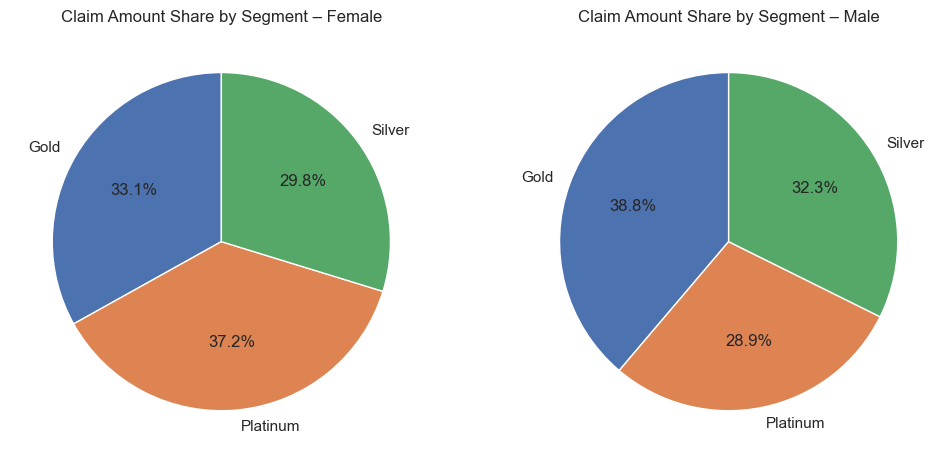

In [19]:
genders = agg_gender_segment["gender"].unique()

fig, axes = plt.subplots(1, len(genders), figsize=(6 * len(genders), 6))

if len(genders) == 1:
    axes = [axes]

for ax, g in zip(axes, genders):
    subset = agg_gender_segment[agg_gender_segment["gender"] == g]
    ax.pie(
        subset["claim_amount"],
        labels=subset["Segment"],
        autopct="%1.1f%%",
        startangle=90
    )
    ax.set_title(f"Claim Amount Share by Segment – {g}")

plt.show()


## 12. Gender with highest driver-related claim amount

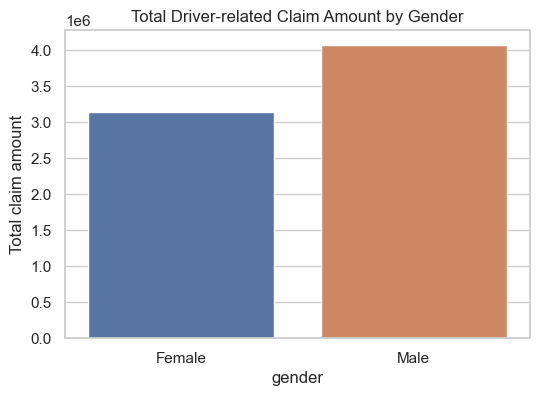

,gender,total_driver_claim_amount
0,Female,3.136377e+06
1,Male,4.069583e+06


In [20]:
driver_claims = data_imputed[data_imputed["incident_cause"].isin(driver_causes)]

gender_driver_amount = (
    driver_claims
    .groupby("gender")["claim_amount"]
    .sum()
    .reset_index(name="total_driver_claim_amount")
)

plt.figure(figsize=(6,4))
sns.barplot(data=gender_driver_amount, x="gender", y="total_driver_claim_amount")
plt.title("Total Driver-related Claim Amount by Gender")
plt.ylabel("Total claim amount")
plt.show()

gender_driver_amount


## 13. Age group with maximum fraudulent policy claims

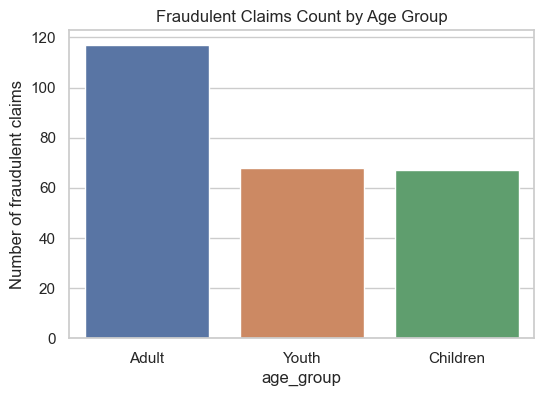

,age_group,fraud_count
0,Adult,117
2,Youth,68
1,Children,67


In [21]:
fraud = data_imputed[data_imputed["fraudulent"].str.lower() == "yes"]

fraud_by_age = (
    fraud
    .groupby("age_group")["customer_id"]
    .count()
    .reset_index(name="fraud_count")
    .sort_values("fraud_count", ascending=False)
)

plt.figure(figsize=(6,4))
sns.barplot(data=fraud_by_age, x="age_group", y="fraud_count")
plt.title("Fraudulent Claims Count by Age Group")
plt.ylabel("Number of fraudulent claims")
plt.show()

fraud_by_age


## 14. Monthly trend of total claim amount

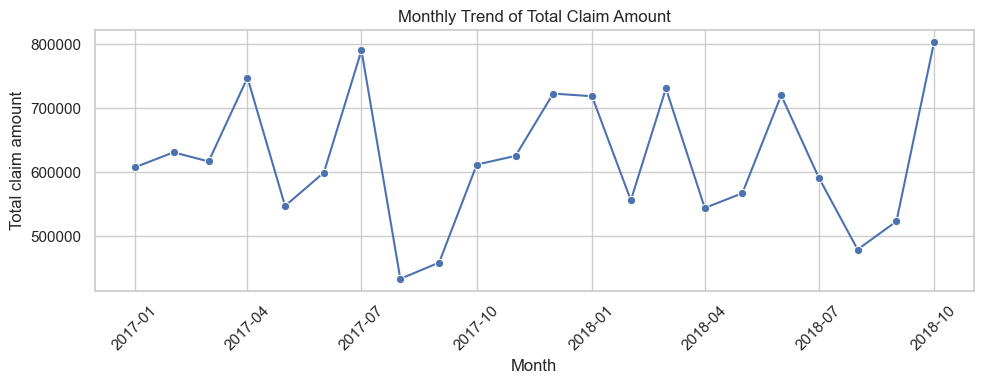

,year_month,total_claim_amount
0,2017-01,607937.498541
1,2017-02,631403.999027
2,2017-03,617233.999027
3,2017-04,747949.499514
4,2017-05,547692.998541
5,2017-06,599861.499514
6,2017-07,790763.998054
7,2017-08,433852.499027
8,2017-09,459285.496595
9,2017-10,612256.998541


In [23]:
data_imputed["year_month"] = data_imputed["claim_date"].dt.to_period("M").astype(str)

monthly_trend = (
    data_imputed
    .groupby("year_month")["claim_amount"]
    .sum()
    .reset_index(name="total_claim_amount")
)

monthly_trend["year_month_dt"] = pd.to_datetime(monthly_trend["year_month"] + "-01")
monthly_trend = monthly_trend.sort_values("year_month_dt")

plt.figure(figsize=(10,4))
sns.lineplot(data=monthly_trend, x="year_month_dt", y="total_claim_amount", marker="o")
plt.title("Monthly Trend of Total Claim Amount")
plt.xlabel("Month")
plt.ylabel("Total claim amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

monthly_trend[["year_month", "total_claim_amount"]]



## 15. Average claim amount by gender & age group

In [24]:
avg_claim_gender_age_fraud = (
    data_imputed
    .groupby(["fraudulent", "gender", "age_group"])["claim_amount"]
    .mean()
    .reset_index(name="avg_claim_amount")
)

avg_claim_gender_age_fraud


,fraudulent,gender,age_group,avg_claim_amount
0,No,Female,Adult,12176.230952
1,No,Female,Children,12305.107905
2,No,Female,Youth,12847.414509
3,No,Male,Adult,12706.310963
4,No,Male,Children,11544.633319
5,No,Male,Youth,12270.911969
6,Yes,Female,Adult,15554.930984
7,Yes,Female,Children,6440.328571
8,Yes,Female,Youth,8257.468689
9,Yes,Male,Adult,16245.660984


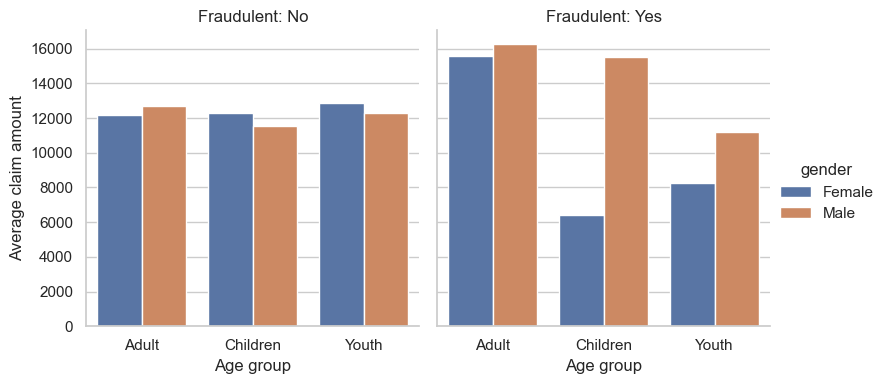

In [25]:
g = sns.catplot(
    data=avg_claim_gender_age_fraud,
    x="age_group",
    y="avg_claim_amount",
    hue="gender",
    col="fraudulent",
    kind="bar",
    height=4,
    aspect=1
)
g.set_titles("Fraudulent: {col_name}")
g.set_axis_labels("Age group", "Average claim amount")
plt.show()


## 16–20. Hypothesis testing

### 16. Similarity in claim amount by gender

In [26]:
male_claims = data_imputed.loc[data_imputed["gender"].str.lower() == "male", "claim_amount"]
female_claims = data_imputed.loc[data_imputed["gender"].str.lower() == "female", "claim_amount"]

print("Male claims count:", len(male_claims))
print("Female claims count:", len(female_claims))

# H0: mean_male == mean_female
# H1: mean_male != mean_female
t_stat, p_val = stats.ttest_ind(male_claims, female_claims, equal_var=False)

print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("Conclusion: Reject H0 – claim amounts differ significantly between males and females.")
else:
    print("Conclusion: Fail to reject H0 – no significant difference; amounts are statistically similar.")


Male claims count: 566
Female claims count: 527
t-statistic: 0.899, p-value: 0.3690
Conclusion: Fail to reject H0 – no significant difference; amounts are statistically similar.


### 17. Relationship between age category and segment

In [27]:
contingency_age_segment = pd.crosstab(data_imputed["age_group"], data_imputed["Segment"])

chi2, p_val, dof, expected = stats.chi2_contingency(contingency_age_segment)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p_val)

if p_val < 0.05:
    print("Conclusion: Reject H0 – age group and segment are associated.")
else:
    print("Conclusion: Fail to reject H0 – no evidence of relationship between age group and segment.")

contingency_age_segment


Chi-square statistic: 2.775366582866211
Degrees of freedom: 4
p-value: 0.5960923169345067
Conclusion: Fail to reject H0 – no evidence of relationship between age group and segment.


Segment,Gold,Platinum,Silver
age_group,,,
Adult,190,165,168
Children,96,83,81
Youth,100,113,97


### 18. Current year vs 2016–17 fiscal average of $10,000

In [28]:
data_imputed["year"] = data_imputed["claim_date"].dt.year

current_year = data_imputed["year"].max()
current_year_data = data_imputed.loc[data_imputed["year"] == current_year, "claim_amount"]

print("Current year considered:", current_year)
print("Number of claims in current year:", len(current_year_data))

# H0: mean_current_year == 10000
# H1: mean_current_year > 10000  (one-sided test)
t_stat, p_two_sided = stats.ttest_1samp(current_year_data, popmean=10000)

p_one_sided = p_two_sided / 2 if t_stat > 0 else 1 - p_two_sided / 2

print(f"t-statistic: {t_stat:.3f}, one-sided p-value: {p_one_sided:.4f}")

if p_one_sided < 0.05:
    print("Conclusion: Reject H0 – current year mean claim amount is significantly higher than $10,000.")
else:
    print("Conclusion: Fail to reject H0 – no significant evidence that current year mean exceeds $10,000.")


Current year considered: 2018
Number of claims in current year: 492
t-statistic: 4.415, one-sided p-value: 0.0000
Conclusion: Reject H0 – current year mean claim amount is significantly higher than $10,000.


### 19. Difference between age groups in claim amounts (ANOVA)

In [29]:
groups = [grp["claim_amount"].values for name, grp in data_imputed.groupby("age_group")]

f_stat, p_val = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.3f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("Conclusion: Reject H0 – mean claim amounts differ across age groups.")
else:
    print("Conclusion: Fail to reject H0 – no significant difference in mean claim amounts across age groups.")


F-statistic: 1.615, p-value: 0.1994
Conclusion: Fail to reject H0 – no significant difference in mean claim amounts across age groups.


### 20. Relationship between total number of policy claims and claim amount

In [30]:
x = data_imputed["total_policy_claims"]
y = data_imputed["claim_amount"]

corr, p_val = stats.pearsonr(x, y)

print(f"Pearson correlation: {corr:.3f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("Conclusion: Significant linear relationship between total policy claims and claim amount.")
else:
    print("Conclusion: No statistically significant linear relationship between total policy claims and claim amount.")


Pearson correlation: -0.024, p-value: 0.4297
Conclusion: No statistically significant linear relationship between total policy claims and claim amount.
